<a href="https://colab.research.google.com/github/trang1812/API/blob/main/Eco2AI_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wellcome to **eco2ai** tutorial
In order to learn how to use eco2ai in specific frameworks, you can see the content list

Install the eco2ai library in your anaconda terminal using the following command:

***pip install eco2ai***

and run this jupyter notebook as a usage example!

In [ ]:
# run this comand and then restart the runtime
!pip install eco2ai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eco2ai
from eco2ai import track

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from PIL import Image
import os

##Keras

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

###Prepearing Mnist Dataset

11501568/11490434 [==============================] - 0s 0us/step


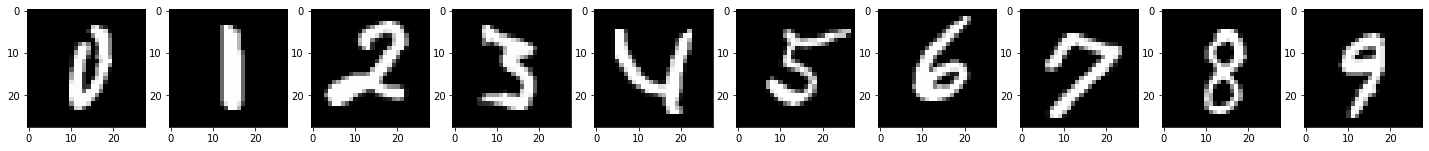

In [ ]:
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
    label_indexes = np.where(y_train==i)[0] 
    index = random.choice(label_indexes) 
    img = x_train[index] 
    axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show() 

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

###Utils

In [ ]:
def create_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

def train_model(
    model,
    epochs=5,
    batch_size=256,
    ):
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test),verbose=1)

    plt.plot(history.history['accuracy'], 
            label='train accuracy')
    plt.plot(history.history['val_accuracy'], 
            label='val accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

###General usage example

/usr/local/lib/python3.7/dist-packages/eco2ai/emission_track.py:134: UserWarning: 
    If you use a VPN, you may have problems with identifying your country by IP.
    It is recommended to disable VPN or
    manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
    You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes
    
  """


Epoch 1/5
235/235 [==============================] - 14s 10ms/step - loss: 0.5544 - accuracy: 0.8253 - val_loss: 0.1045 - val_accuracy: 0.9682
Epoch 2/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1792 - accuracy: 0.9455 - val_loss: 0.0620 - val_accuracy: 0.9796
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1293 - accuracy: 0.9603 - val_loss: 0.0553 - val_accuracy: 0.9811
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.0466 - val_accuracy: 0.9840
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.0927 - accuracy: 0.9723 - val_loss: 0.0438 - val_accuracy: 0.9850


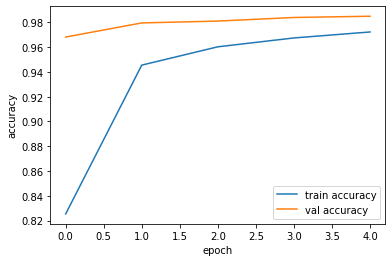

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="mnist for ESG", 
    experiment_description="Convolutional model test1",
    )
#start tracking
tracker.start()

model = create_model()
train_model(model, epochs=5, batch_size=256)

#end tracking
tracker.stop()

In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,05955446-53dd-4602-8146-da5fb67a95fe,mnist for ESG,Convolutional model test1,NaN,2022-09-05 08:58:54,25.158808,0.000849,0.000332,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN


###Advanced usage example

In [ ]:
# Tracker parameters description:
help(eco2ai.Tracker)

/usr/local/lib/python3.7/dist-packages/eco2ai/emission_track.py:134: UserWarning: 
    If you use a VPN, you may have problems with identifying your country by IP.
    It is recommended to disable VPN or
    manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
    You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes
    
  """


Epoch 1/5
235/235 [==============================] - 3s 8ms/step - loss: 0.5718 - accuracy: 0.8166 - val_loss: 0.1268 - val_accuracy: 0.9597
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.2120 - accuracy: 0.9357 - val_loss: 0.0808 - val_accuracy: 0.9743
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.1564 - accuracy: 0.9537 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.1257 - accuracy: 0.9614 - val_loss: 0.0590 - val_accuracy: 0.9808
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.0476 - val_accuracy: 0.9844


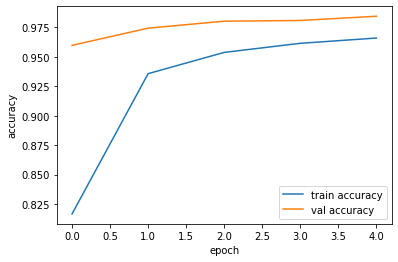

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="mnist for ESG", 
    experiment_description="Convolutional model test2. ",
    file_name="emission.csv",
    measure_period=5,
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="CA", #Canada
    region="Ontario",
    pue=1.4,
    # encoded results will be saved to file "encoded_" + file_name.
    encode_file=True,
    electricity_pricing={
        "6:00-14:30": 150,
        "14:30-22:00": 200,
        "22:00-6:00": 100
    },
    )
#start tracking
tracker.start()

model = create_model()
train_model(model, epochs=5, batch_size=256)

#end tracking
tracker.stop()

In [ ]:
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,05955446-53dd-4602-8146-da5fb67a95fe,mnist for ESG,Convolutional model test1,NaN,2022-09-05 08:58:54,25.158808,0.000849,0.000332,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN
1,bc7306f2-79b3-48ea-8b1f-a018b5fc762f,mnist for ESG,Convolutional model test2.,NaN,2022-09-05 08:59:20,10.176405,0.000530,0.000016,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.079453


###Decorators usage example

/usr/local/lib/python3.7/dist-packages/eco2ai/emission_track.py:134: UserWarning: 
    If you use a VPN, you may have problems with identifying your country by IP.
    It is recommended to disable VPN or
    manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
    You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes
    
  """


Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.3119 - accuracy: 0.9083 - val_loss: 0.1546 - val_accuracy: 0.9586
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.1136 - accuracy: 0.9681 - val_loss: 0.0870 - val_accuracy: 0.9734
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 0.0770 - val_accuracy: 0.9752
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0654 - val_accuracy: 0.9794
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0661 - val_accuracy: 0.9797


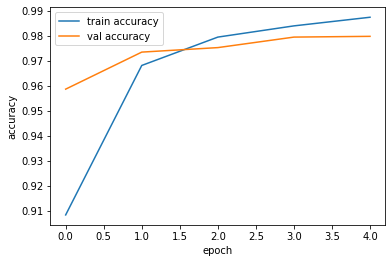

In [ ]:
#Creating tracker object
tracker = eco2ai.Tracker(
    project_name="Mnist, testing decorators", 
    experiment_description="simple model",
    file_name="emission.csv"
    )

#using decorators
@track
def train_func():
    batch_size = 256 

    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test),verbose=1)

    plt.plot(history.history['accuracy'], 
            label='train accuracy')
    plt.plot(history.history['val_accuracy'], 
            label='val accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


train_func()

In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,05955446-53dd-4602-8146-da5fb67a95fe,mnist for ESG,Convolutional model test1,NaN,2022-09-05 08:58:54,25.158808,0.000849,0.000332,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN
1,bc7306f2-79b3-48ea-8b1f-a018b5fc762f,mnist for ESG,Convolutional model test2.,NaN,2022-09-05 08:59:20,10.176405,0.000530,0.000016,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.079453
2,e8d94cdf-138c-4277-b930-11d0d657db7d,"Mnist, testing decorators",simple model,NaN,2022-09-05 08:59:32,11.106667,0.000095,0.000037,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN


###ML tracking usage example

In [ ]:
epochs = 5

tracker = eco2ai.Tracker(
    project_name="mnist for ESG", 
    experiment_description="ML tracking",
    file_name="emission.csv",
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="AU", #Australia
    region="Queensland",
    )
tracker.start_training()

model = create_model()

for epoch in range(epochs):

    history = model.fit(x_train, y_train, batch_size=256, epochs=1, validation_data=(x_test, y_test),verbose=1)
    # type(history.history) == dict
    # print(history.history)
    parameters_to_save = {item[0]: item[1][0] for item in history.history.items()}
    # telling to the tracker to start new epoch tracking and so save model parameters
    tracker.new_epoch(parameters_to_save)

tracker.stop_training()


/usr/local/lib/python3.7/dist-packages/eco2ai/emission_track.py:134: UserWarning: 
    If you use a VPN, you may have problems with identifying your country by IP.
    It is recommended to disable VPN or
    manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
    You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes
    
  """


235/235 [==============================] - 2s 8ms/step - loss: 0.0966 - accuracy: 0.9698 - val_loss: 0.0434 - val_accuracy: 0.9853


In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,05955446-53dd-4602-8146-da5fb67a95fe,mnist for ESG,Convolutional model test1,NaN,2022-09-05 08:58:54,25.158808,0.000849,0.000332,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN
1,bc7306f2-79b3-48ea-8b1f-a018b5fc762f,mnist for ESG,Convolutional model test2.,NaN,2022-09-05 08:59:20,10.176405,0.000530,0.000016,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,CA/Ontario,0.079453
2,e8d94cdf-138c-4277-b930-11d0d657db7d,"Mnist, testing decorators",simple model,NaN,2022-09-05 08:59:32,11.106667,0.000095,0.000037,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,US/Iowa,NaN
3,306445c8-501b-4640-835b-cb7bc6d1d5f9,mnist for ESG,ML tracking,"epoch: 1, loss: 0.47366252541542053, accuracy:...",2022-09-05 08:59:44,2.907213,0.000032,0.000025,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,NaN
4,306445c8-501b-4640-835b-cb7bc6d1d5f9,mnist for ESG,ML tracking,"epoch: 2, loss: 0.17755316197872162, accuracy:...",2022-09-05 08:59:47,2.856283,0.000032,0.000025,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,NaN
5,306445c8-501b-4640-835b-cb7bc6d1d5f9,mnist for ESG,ML tracking,"epoch: 3, loss: 0.13414780795574188, accuracy:...",2022-09-05 08:59:50,2.863001,0.000040,0.000032,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,NaN
6,306445c8-501b-4640-835b-cb7bc6d1d5f9,mnist for ESG,ML tracking,"epoch: 4, loss: 0.11053144186735153, accuracy:...",2022-09-05 08:59:53,2.844021,0.000032,0.000025,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,NaN
7,306445c8-501b-4640-835b-cb7bc6d1d5f9,mnist for ESG,ML tracking,"epoch: 5, loss: 0.09659876674413681, accuracy:...",2022-09-05 08:59:56,2.862078,0.000032,0.000026,"Intel(R) Xeon(R) CPU @ 2.30GHz/1 device(s), TD...",Tesla T4 1 device(s),Linux,AU/Queensland,NaN


###Summary statistics

In [ ]:
eco2ai.summary('emission.csv')

,project_name,total duration(s),total power_consumption(kWh),total CO2_emissions(kg),total electricity cost
0,"Mnist, testing decorators",11.106667,0.000095,0.000037,NaN
1,mnist for ESG,49.667810,0.001546,0.000482,NaN
2,All the projects,60.774477,0.001641,0.000519,NaN


##PyTorch

The guide was taken from [pytorch_tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

###Data transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


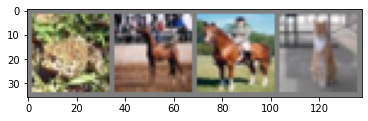

frog  horse horse cat  


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
for images, labels in dataiter:
  break
# images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

###Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

###Utils

In [ ]:
def train_epoch(
    net, 
    optimizer, 
    trainloader
    ):
    result_loss = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        result_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    return round(result_loss / len(trainloader), 3)

In [ ]:
def get_accuracy(net, testloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct // total

In [ ]:
def plot_results(net, testloader):
    dataiter = iter(testloader)
    for images, labels in dataiter:
      break

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

###General usage example

In [ ]:
#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG", 
    experiment_description="Convolutional model test1",
    )
#start tracking
tracker.start()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times
    
    train_epoch(net, optimizer, trainloader)

print('Finished Training')

#end tracking
tracker.stop()

/usr/local/lib/python3.9/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.199
[1,  4000] loss: 1.831
[1,  6000] loss: 1.660
[1,  8000] loss: 1.584
[1, 10000] loss: 1.513
[1, 12000] loss: 1.479
[2,  2000] loss: 1.400
[2,  4000] loss: 1.390
[2,  6000] loss: 1.354
[2,  8000] loss: 1.322
[2, 10000] loss: 1.323
[2, 12000] loss: 1.289
Finished Training


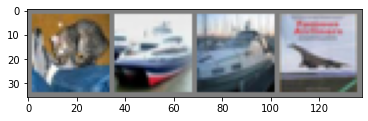

GroundTruth:  cat   ship  ship  plane
Accuracy of the network on the 10000 test images: 55 %


In [ ]:
plot_results(net, testloader)

In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,4374cf95-b241-4b35-be60-a09f04fc7c8f,CIFAR10 for ESG,Convolutional model test1,NaN,2023-03-09 19:57:07,134.77402,0.004987,0.001966,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0


###Advanced usage example

In [ ]:
# Tracker parameters description:
help(eco2ai.Tracker)

Help on class Tracker in module eco2ai.emission_track:

class Tracker(builtins.object)
 |  Tracker(project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes='current', pue=1, encode_file=None, electricity_pricing=None, ignore_warnings=False)
 |  
 |  This class calculates CO2 emissions during CPU or GPU calculations 
 |  In order to calculate CPU & GPU power consumption correctly you should create the 'Tracker' before any CPU or GPU usage
 |  It is recommended to create a new “Tracker” object per every new calculation.
 |  
 |  Example
 |  ----------
 |  import eco2ai.Tracker
 |  tracker = eco2ai.Tracker()
 |  
 |  tracker.start()
 |  
 |  *your CPU and GPU calculations*
 |  
 |  tracker.stop()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, project_name=None, experiment_description=None, file_name=None, measure_period=10, emission_level=None, alpha_2_code=None, region=None, cpu_processes

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

#Creating the Tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG", 
    experiment_description="Convolutional model test2.",
    file_name="emission.csv",
    measure_period=10,
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="CA", #Canada
    region="Ontario",
    pue=1.4,
    # encoded results will be saved to file "encoded_" + file_name.
    encode_file=True,
    electricity_pricing={
        "6:00-14:30": 150,
        "14:30-22:00": 200,
        "22:00-6:00": 100
    },
    )
#start tracking
tracker.start()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(1):  # loop over the dataset multiple times
    train_epoch(net, optimizer, trainloader)

#end tracking
tracker.stop()

/usr/local/lib/python3.9/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.266
[1,  4000] loss: 1.929
[1,  6000] loss: 1.686
[1,  8000] loss: 1.583
[1, 10000] loss: 1.517
[1, 12000] loss: 1.460


In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,4374cf95-b241-4b35-be60-a09f04fc7c8f,CIFAR10 for ESG,Convolutional model test1,NaN,2023-03-09 19:57:07,134.774020,0.004987,0.001966,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0.00000
1,760cbe24-696c-4cab-ad51-c0ac2ca4b206,CIFAR10 for ESG,Convolutional model test2.,NaN,2023-03-09 19:59:32,65.925853,0.003255,0.000098,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,CA/Ontario,0.65107


###Decorators usage example

In [ ]:
#Creating tracker object
tracker = eco2ai.Tracker(
    project_name="CIFAR10, testing decorators", 
    experiment_description="simple model",
    file_name="emission.csv"
    )

#using decorators
@track
def train_model(
    net, 
    optimizer, 
    trainloader,
    epochs=1,
    ):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

/usr/local/lib/python3.9/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

train_model(
    net, 
    optimizer, 
    trainloader,
    )

/usr/local/lib/python3.9/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.246
[1,  4000] loss: 1.936
[1,  6000] loss: 1.709
[1,  8000] loss: 1.612
[1, 10000] loss: 1.540
[1, 12000] loss: 1.507


In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,4374cf95-b241-4b35-be60-a09f04fc7c8f,CIFAR10 for ESG,Convolutional model test1,NaN,2023-03-09 19:57:07,134.774020,0.004987,0.001966,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0.00000
1,760cbe24-696c-4cab-ad51-c0ac2ca4b206,CIFAR10 for ESG,Convolutional model test2.,NaN,2023-03-09 19:59:32,65.925853,0.003255,0.000098,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,CA/Ontario,0.65107
2,bcb56164-94cc-4156-b9fa-cdcf8807ff91,"CIFAR10, testing decorators",simple model,NaN,2023-03-09 20:00:39,66.856721,0.002278,0.000898,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0.00000


###ML tracking usage example

In [ ]:
epochs = 2

tracker = eco2ai.Tracker(
    project_name="CIFAR10 for ESG", 
    experiment_description="ML tracking",
    file_name="emission.csv",
    # tracker will automatically define emission_level
    emission_level=None,
    alpha_2_code="AU", #Australia
    region="Queensland",
    )

tracker.start_training()

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

parameters_to_save = dict()
for epoch in range(epochs):  # loop over the dataset multiple times
    parameters_to_save["loss"] = train_epoch(net, optimizer, trainloader)
    parameters_to_save["train_accuracy"] = get_accuracy(net, trainloader)
    parameters_to_save["test_accuracy"] = get_accuracy(net, testloader)
    # print(parameters_to_save)
    # telling to the tracker to start new epoch tracking and to save model parameters
    tracker.new_epoch(parameters_to_save)

tracker.stop_training()

/usr/local/lib/python3.9/dist-packages/eco2ai/emission_track.py:135: UserWarning: 
If you use a VPN, you may have problems with identifying your country by IP.
It is recommended to disable VPN or
manually install the ISO-Alpha-2 code of your country during initialization of the Tracker() class.
You can find the ISO-Alpha-2 code of your country here: https://www.iban.com/country-codes

  warnings.warn(


[1,  2000] loss: 2.206
[1,  4000] loss: 1.869
[1,  6000] loss: 1.664
[1,  8000] loss: 1.547
[1, 10000] loss: 1.511
[1, 12000] loss: 1.430
{'loss': 1.693, 'train_accuracy': 50, 'test_accuracy': 49}
[2,  2000] loss: 1.377
[2,  4000] loss: 1.344
[2,  6000] loss: 1.339
[2,  8000] loss: 1.323
[2, 10000] loss: 1.285
[2, 12000] loss: 1.281
{'loss': 1.324, 'train_accuracy': 56, 'test_accuracy': 54}


In [ ]:
#checking results
df = pd.read_csv('emission.csv')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,4374cf95-b241-4b35-be60-a09f04fc7c8f,CIFAR10 for ESG,Convolutional model test1,NaN,2023-03-09 19:57:07,134.774020,0.004987,0.001966,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0.00000
1,760cbe24-696c-4cab-ad51-c0ac2ca4b206,CIFAR10 for ESG,Convolutional model test2.,NaN,2023-03-09 19:59:32,65.925853,0.003255,0.000098,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,CA/Ontario,0.65107
2,bcb56164-94cc-4156-b9fa-cdcf8807ff91,"CIFAR10, testing decorators",simple model,NaN,2023-03-09 20:00:39,66.856721,0.002278,0.000898,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,NL/Groningen,0.00000
3,7d794c79-0047-40ea-b8d2-24cccf9f46b5,CIFAR10 for ESG,ML tracking,"epoch: 1, loss: 1.693, train_accuracy: 50, tes...",2023-03-09 20:01:47,118.979874,0.000328,0.000262,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,AU/Queensland,0.00000
4,7d794c79-0047-40ea-b8d2-24cccf9f46b5,CIFAR10 for ESG,ML tracking,"epoch: 2, loss: 1.324, train_accuracy: 56, tes...",2023-03-09 20:03:46,130.454015,0.000349,0.000279,"Intel(R) Xeon(R) CPU @ 2.00GHz/1 device(s), TD...",1 device(s),Linux,AU/Queensland,0.00000


###Summary statistics

In [ ]:
eco2ai.summary('emission.csv')

,project_name,total duration(s),total power_consumption(kWh),total CO2_emissions(kg),total electricity cost
0,CIFAR10 for ESG,450.133763,0.008920,0.002605,0.65107
1,"CIFAR10, testing decorators",66.856721,0.002278,0.000898,0.00000
2,All the projects,516.990484,0.011197,0.003503,0.65107
